# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID'].nunique()
print(f'Total number of unique mice: {num_mice}')

Total number of unique mice: 249


In [35]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [36]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id = duplicate_mice['Mouse ID'].unique()[0]
duplicate_mouse_data = merged_data[merged_data['Mouse ID'] == duplicate_mouse_id]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data['Mouse ID'] != duplicate_mouse_id]

In [38]:
# Checking the number of mice in the clean DataFrame.
num_cleaned_mice = cleaned_data['Mouse ID'].nunique()
print(f'Total number of unique mice after cleaning: {num_cleaned_mice}')

Total number of unique mice after cleaning: 248


## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_group = cleaned_data.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
)
# Assemble the resulting series into a single summary DataFrame.
summary_stats

,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  cleaned_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Total Number of Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Timepoints'>

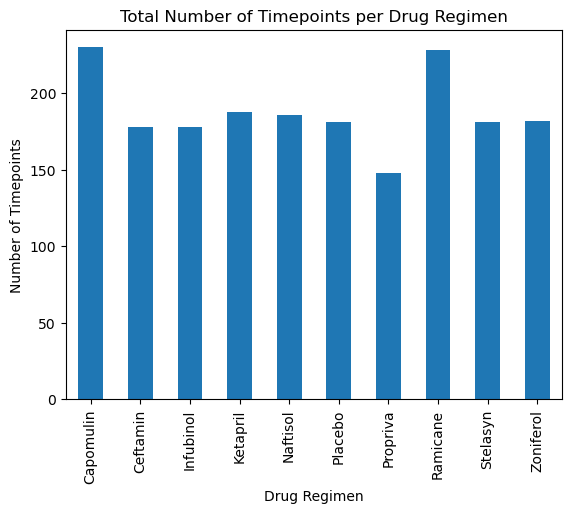

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import pandas as pd

regimen_counts = cleaned_data.groupby('Drug Regimen').count()['Mouse ID']
regimen_counts.plot(kind='bar', title='Total Number of Timepoints per Drug Regimen', xlabel='Drug Regimen', ylabel='Number of Timepoints')

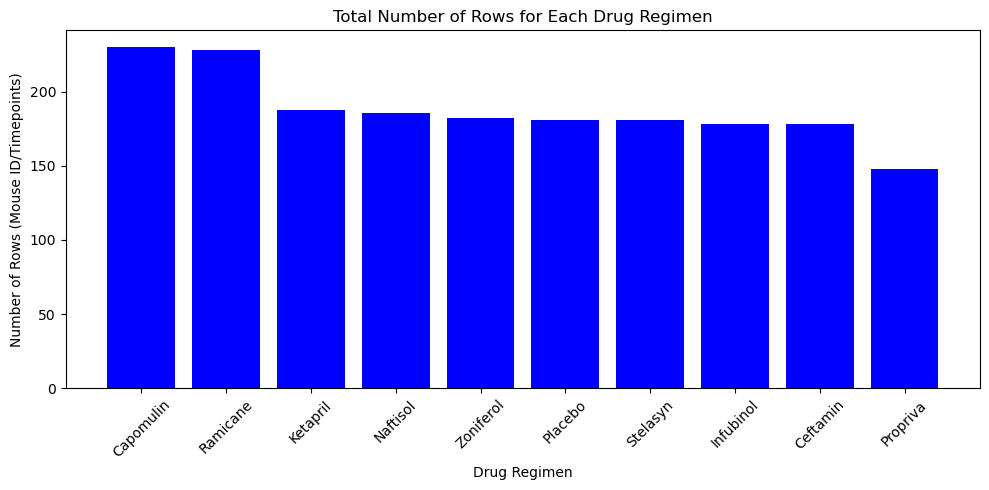

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

regimen_counts = cleaned_data['Drug Regimen'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(regimen_counts.index, regimen_counts.values, color='blue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Distribution of Mice by Sex'}, ylabel='Mouse ID'>

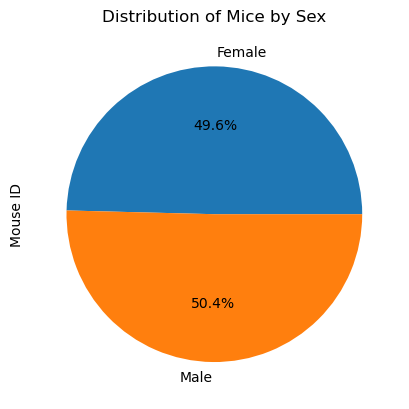

In [43]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
import pandas as pd

# Get the unique mice with their gender
gender_counts = cleaned_data.groupby('Sex')['Mouse ID'].nunique()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Mice by Sex')

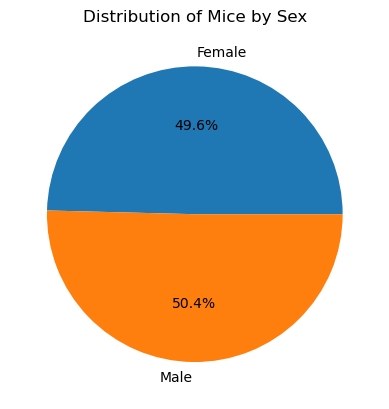

In [44]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
import matplotlib.pyplot as plt

# Get the unique mice with their gender
gender_counts = cleaned_data.groupby('Sex')['Mouse ID'].nunique()

# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Mice by Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoints = pd.merge(last_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Filter for the four regimens of interest: Capomulin, Ramicane, Infubinol, and Ceftamin
regimens_of_interest = merged_last_timepoints[merged_last_timepoints['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Print the final tumor volumes for each mouse for the four treatment regimens
print(regimens_of_interest[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])

    Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0       a203    Infubinol         45           67.973419
1       a251    Infubinol         45           65.525743
3       a275     Ceftamin         45           62.999356
6       a411     Ramicane         45           38.407618
7       a444     Ramicane         45           43.047543
..       ...          ...        ...                 ...
238     y769     Ceftamin         45           68.594745
239     y793    Capomulin         45           31.896238
240     y865     Ceftamin         45           64.729837
244     z578     Ramicane         45           30.638696
245     z581    Infubinol         45           62.754451

[100 rows x 4 columns]


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in regimen_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = regimens_of_interest[regimens_of_interest['Drug Regimen'] == regimen]['Tumor Volume (mm3)']

    # add subset
    tumor_volumes.append(tumor_data)

# Calculate the quartiles and IQR
    quartiles = tumor_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Print results for the current regimen
    print(f"{regimen} Regimen:")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    
    # Determine if there are any potential outliers
    outliers = tumor_data[(tumor_data < lower_bound) | (tumor_data > upper_bound)]
    if not outliers.empty:
        print(f"Outliers for {regimen}: {outliers}")
    else:
        print(f"No outliers found for {regimen}")

Capomulin Regimen:
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
No outliers found for Capomulin
Ramicane Regimen:
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
No outliers found for Ramicane
Infubinol Regimen:
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Regimen:
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
No outliers found for Ceftamin


In [47]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [48]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [49]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [50]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
